## Análisis de frecuencia absoluta y relativa para la base de datos de ocupaciones.

In [63]:
# Carga de librerías
import numpy as np # manejo de arreglos
import pandas as pd # lectura y manejo de dataframe como estadística descriptiva
import matplotlib.pyplot as plt # Visualizaciones
import seaborn as sns # para el boxplot y histograma

In [104]:
# Cargar los datos
ocupaciones = pd.read_csv("ocupaciones.csv", delimiter=";")

# Para el estudio de la frecuencia de los datos, se utilizará la cantidad de hombres y mujeres como primera instancia.
frecuencia_absoluta_gender = ocupaciones['gender'].value_counts()
frecuencia_relativa_gender = ocupaciones['gender'].value_counts(normalize=True)

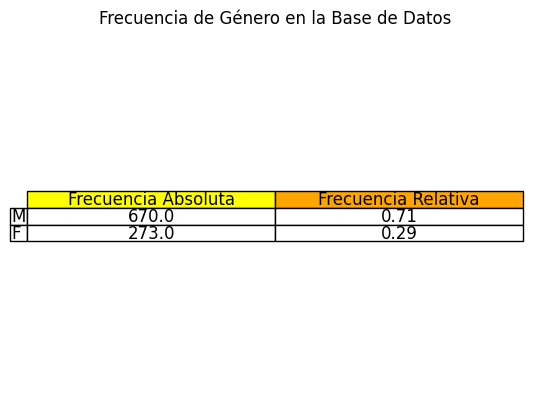

In [110]:
tabla_frecuencia = pd.DataFrame({'Frecuencia Absoluta':frecuencia_absoluta_gender,'Frecuencia Relativa':frecuencia_relativa_gender})

tabla_frecuencia['Frecuencia Relativa'] = tabla_frecuencia['Frecuencia Relativa'].round(2)

fig, ax = plt.subplots()
ax.axis('off')  # Desactiva los ejes para que se vea como una tabla

tabla = ax.table(cellText=tabla_frecuencia.values,
                 colLabels=tabla_frecuencia.columns,
                 rowLabels=tabla_frecuencia.index,
                 loc='center',
                 cellLoc='center',
                 colColours=['yellow', 'orange'])

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

plt.title('Frecuencia de Género en la Base de Datos')
plt.show()

Como se puede apreciar, hay aproximadamente 71% (670) de hombres y un aproximado de 29% (273) de mujeres.

#### Haciendo esto mismo para el caso de las ocupaciones, tendríamos lo siguiente.

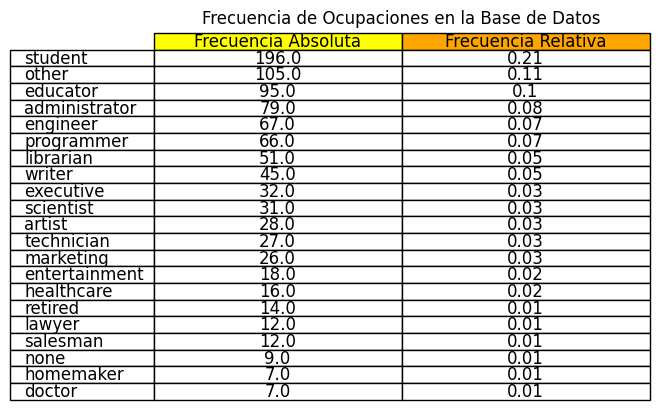

In [109]:
frecuencia_absoluta_occupation = ocupaciones['occupation'].value_counts()
frecuencia_relativa_occupation = ocupaciones['occupation'].value_counts(normalize=True)

tabla_frecuencia_occupation = pd.DataFrame({'Frecuencia Absoluta': frecuencia_absoluta_occupation, 'Frecuencia Relativa': frecuencia_relativa_occupation})

tabla_frecuencia_occupation['Frecuencia Relativa'] = tabla_frecuencia_occupation['Frecuencia Relativa'].round(2)

fig, ax = plt.subplots()
ax.axis('off')
tabla_occupation = ax.table(cellText=tabla_frecuencia_occupation.values,
                             colLabels=tabla_frecuencia_occupation.columns,
                             rowLabels=tabla_frecuencia_occupation.index,
                             loc='center',
                             cellLoc='center',
                             colColours=['yellow', 'orange'])
tabla_occupation.auto_set_font_size(False)
tabla_occupation.set_fontsize(12)
ax.set_title('Frecuencia de Ocupaciones en la Base de Datos')
plt.show()

En esta tabla, se puede ver que es más frecuente la ocupación de estudiante y que el menos frecuente es ama de casa y doctor.

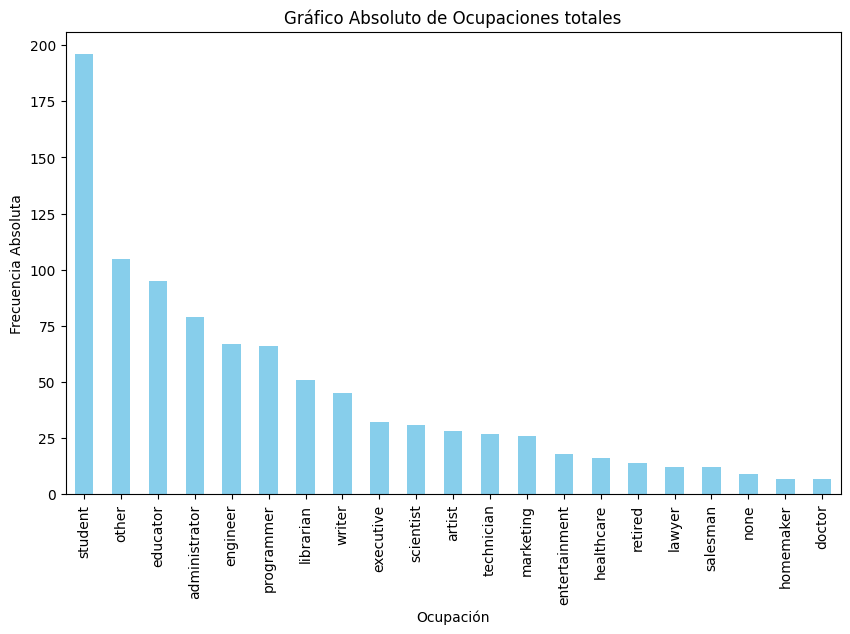

In [68]:
# Análisis de frecuencia para el conjunto de datos

plt.figure(figsize=(10,6))
frecuencia_absoluta_occupation.plot(kind='bar', color='skyblue')
plt.title('Gráfico Absoluto de Ocupaciones totales')
plt.xlabel('Ocupación')
plt.ylabel('Frecuencia Absoluta')
plt.show()

Como se puede observar en la gráfica absoluta de las ocupaciones, hay una gran cantidad de "estudiantes" como ocupación, siguiéndolo por "otros" y "educadores", como se había mostrado anteriormente, además de los menos frecuentes como “ama de casa” y “doctor”..

### Ahora, si agrupamos las ocupaciones con respeto al género, quedaría de la siguiente manera.

<Figure size 1200x800 with 0 Axes>

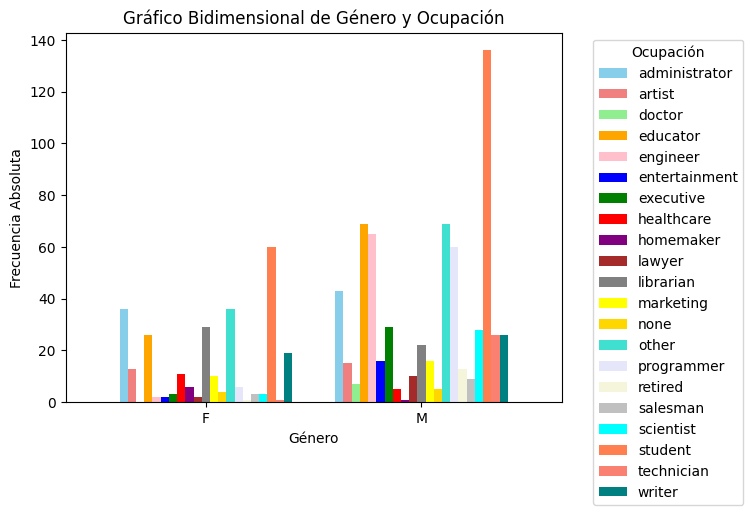

In [69]:
# Gráfico bidimensional de "gender" y "occupation"
grafico_bidimensional = pd.crosstab(ocupaciones['gender'], ocupaciones['occupation'])
colores = ['skyblue','lightcoral','lightgreen','orange','pink','blue','green','red','purple','brown','grey','yellow','gold','turquoise','lavender','beige','silver','cyan','coral','salmon','teal']

plt.figure(figsize=(12, 8))
grafico_bidimensional.plot(kind='bar', color=colores, width=0.8)
plt.title('Gráfico Bidimensional de Género y Ocupación')
plt.xlabel('Género')
plt.ylabel('Frecuencia Absoluta')
plt.legend(title='Ocupación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

En esta gráfica se puede apreciar que tanto en el masculino como en el femenino lidera la ocupación de estudiante, como era de esperarse. Pero también, se puede apreciar que, en el masculino, hay una cantidad considerable de educadores, ingenieros y otras ocupaciones, que superan a la cantidad de estudiantes femeninas, esto se puede deber a la cantidad no menor de hombres en comparación a las mujeres registrados en la base de datos. Ahora, si hacemos un gráfico circular con datos relativos, como se muestra a continuación:

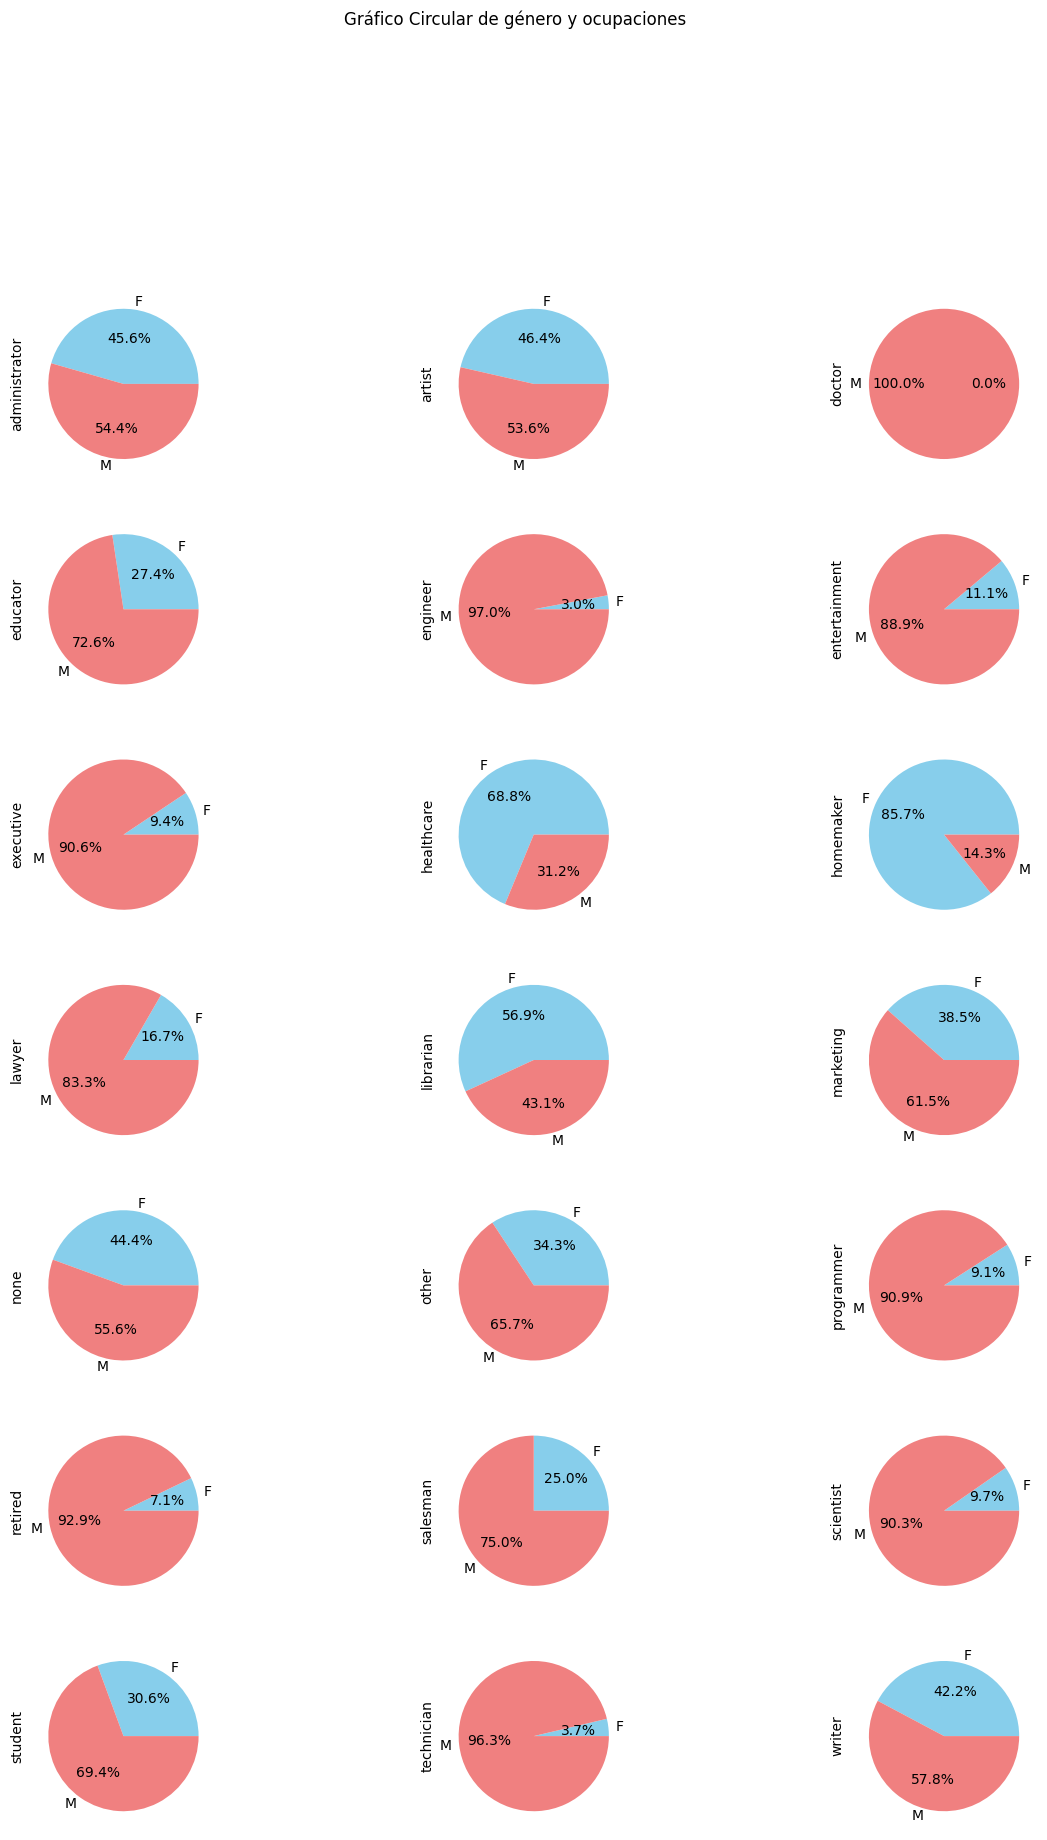

In [70]:
# Gráfico circular
fig, axes = plt.subplots(figsize=(15,20), nrows = 7, ncols = 3)
grafico_bidimensional.plot(kind='pie', subplots=True, autopct='%1.1f%%', colors=colores, ax=axes.flatten(), legend=False)
plt.suptitle('Gráfico Circular de género y ocupaciones', y=1.02)
plt.show()

En esta gráfica, se muestra más detalles con respecto a cada ocupación y al género, como por ejemplo que la ocupación de doctor, solo se encuentran registrados hombres (100%).

### Por otra parte, con la edad, se tendría lo siguiente.

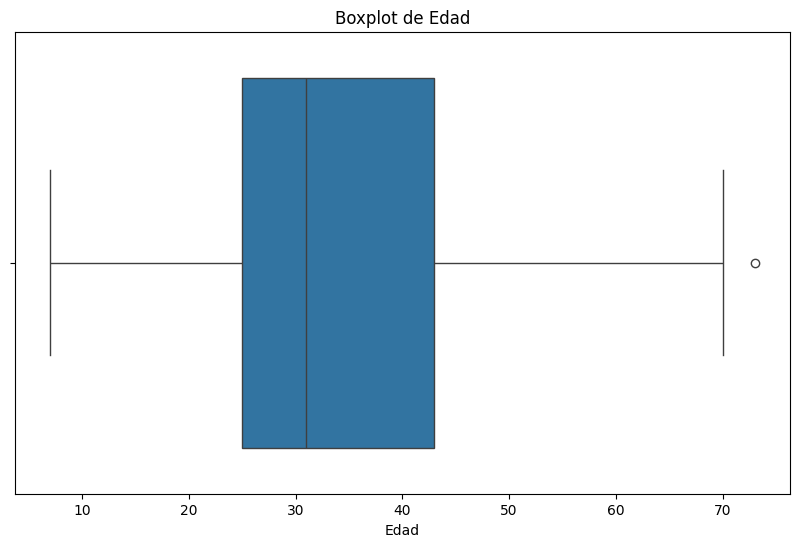

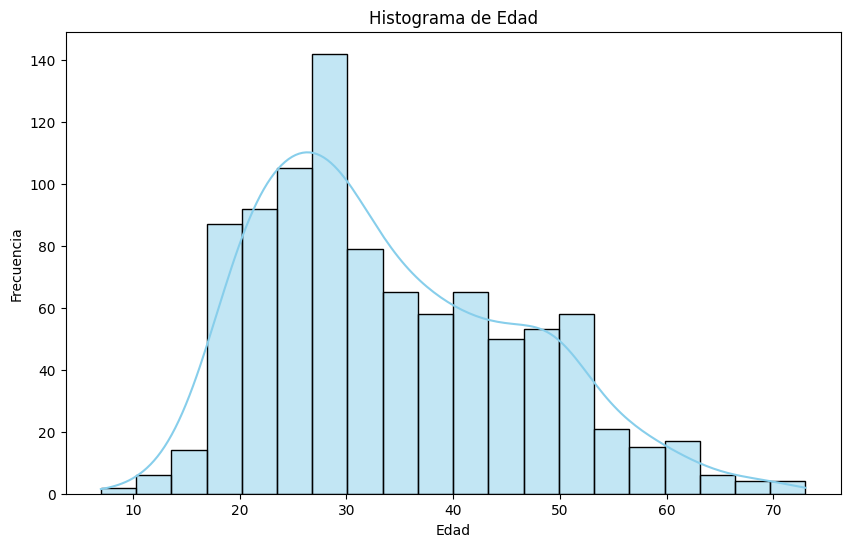

In [71]:
# Gráfico boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=ocupaciones['age'])
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

# Gráfico histograma
plt.figure(figsize=(10, 6))
sns.histplot(ocupaciones['age'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

En estos dos diagramas, se puede observar que la mayor cantidad de personas son de entre 20 a 30 años. La edad, como es una variable cuantitativa, se puede calcular las medidas de tendencia central, las medidas de posición y medidas de dispersión, como se muestra a continuación.

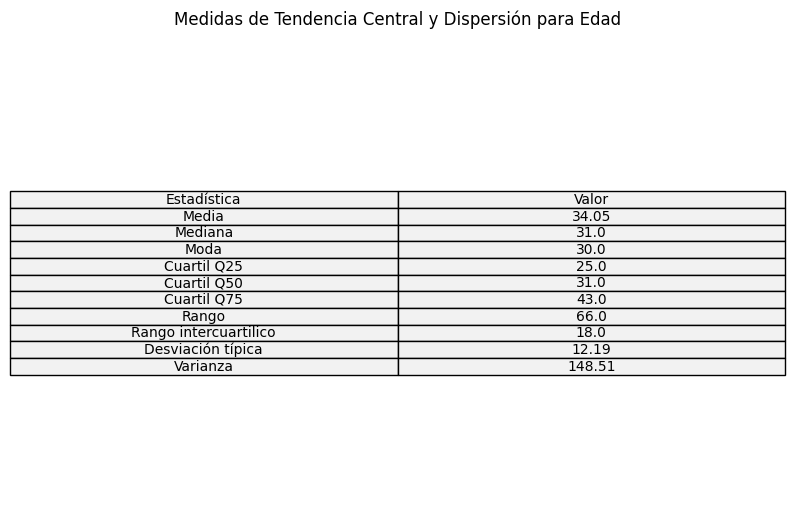

In [107]:
age = ocupaciones['age'] # Variable cuantitativa

# Medidas de tendencia central
media = np.mean(age)
mediana = np.median(age)
moda = age.mode()[0] 

# Medidas de posición
cuartiles = np.percentile(age, [25, 50, 75])
q_25, q_50, q_75 = cuartiles[0], cuartiles[1], cuartiles[2]

# Medidas de dispersión
rango = np.ptp(age)
rango_intercuartilico = q_75 - q_25
desviacion_tipica = np.std(age)
varianza = np.var(age)

# DataFrame para organizar los datos
data = {
    'Estadística': ['Media', 'Mediana', 'Moda', 'Cuartil Q25', 'Cuartil Q50', 'Cuartil Q75', 'Rango', 'Rango intercuartilico', 'Desviación típica', 'Varianza'],
    'Valor': [round(media,2), mediana, moda, q_25, q_50, q_75, rango, rango_intercuartilico, round(desviacion_tipica,2), round(varianza,2)]
}

tabla_datos = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Creación de la tabla
tabla = ax.table(cellText=tabla_datos.values,
                 colLabels=tabla_datos.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f2f2f2'] * len(tabla_datos.columns),
                 cellColours=[['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2']])
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
plt.title('Medidas de Tendencia Central y Dispersión para Edad', pad = 20)
plt.show()

Como se puede apreciar, la media en edad está en 34 años, la mediana y la moda en 31 y 30 años respectivamente. Por otra parte, el 25% de los datos son menores o iguales a 25 años, el 50% de los datos son de 31 años (mediana) y el 75% son menores o iguales 43 años.
El rango es de 66.18, lo que significa que la diferencia entre la edad más baja y la más alta es de 66.18 años.
El rango intercuartílico (IQR) es de 18 años, lo que indica la dispersión en la mitad central de las edades.
La desviación típica es de 12.19, sugiriendo que las edades individuales tienden a desviarse alrededor de 12 años aproximadamente en promedio con respecto a la media.
La varianza es de 148.51.

La edad de las personas muestra varía significativamente, como se evidencia con el rango grande, al igual que en el rango intercuartílico.

### Como gráfico extra, se puede ver la edad y las ocupaciones, como se muestra a continuación. 

<Figure size 1500x1000 with 0 Axes>

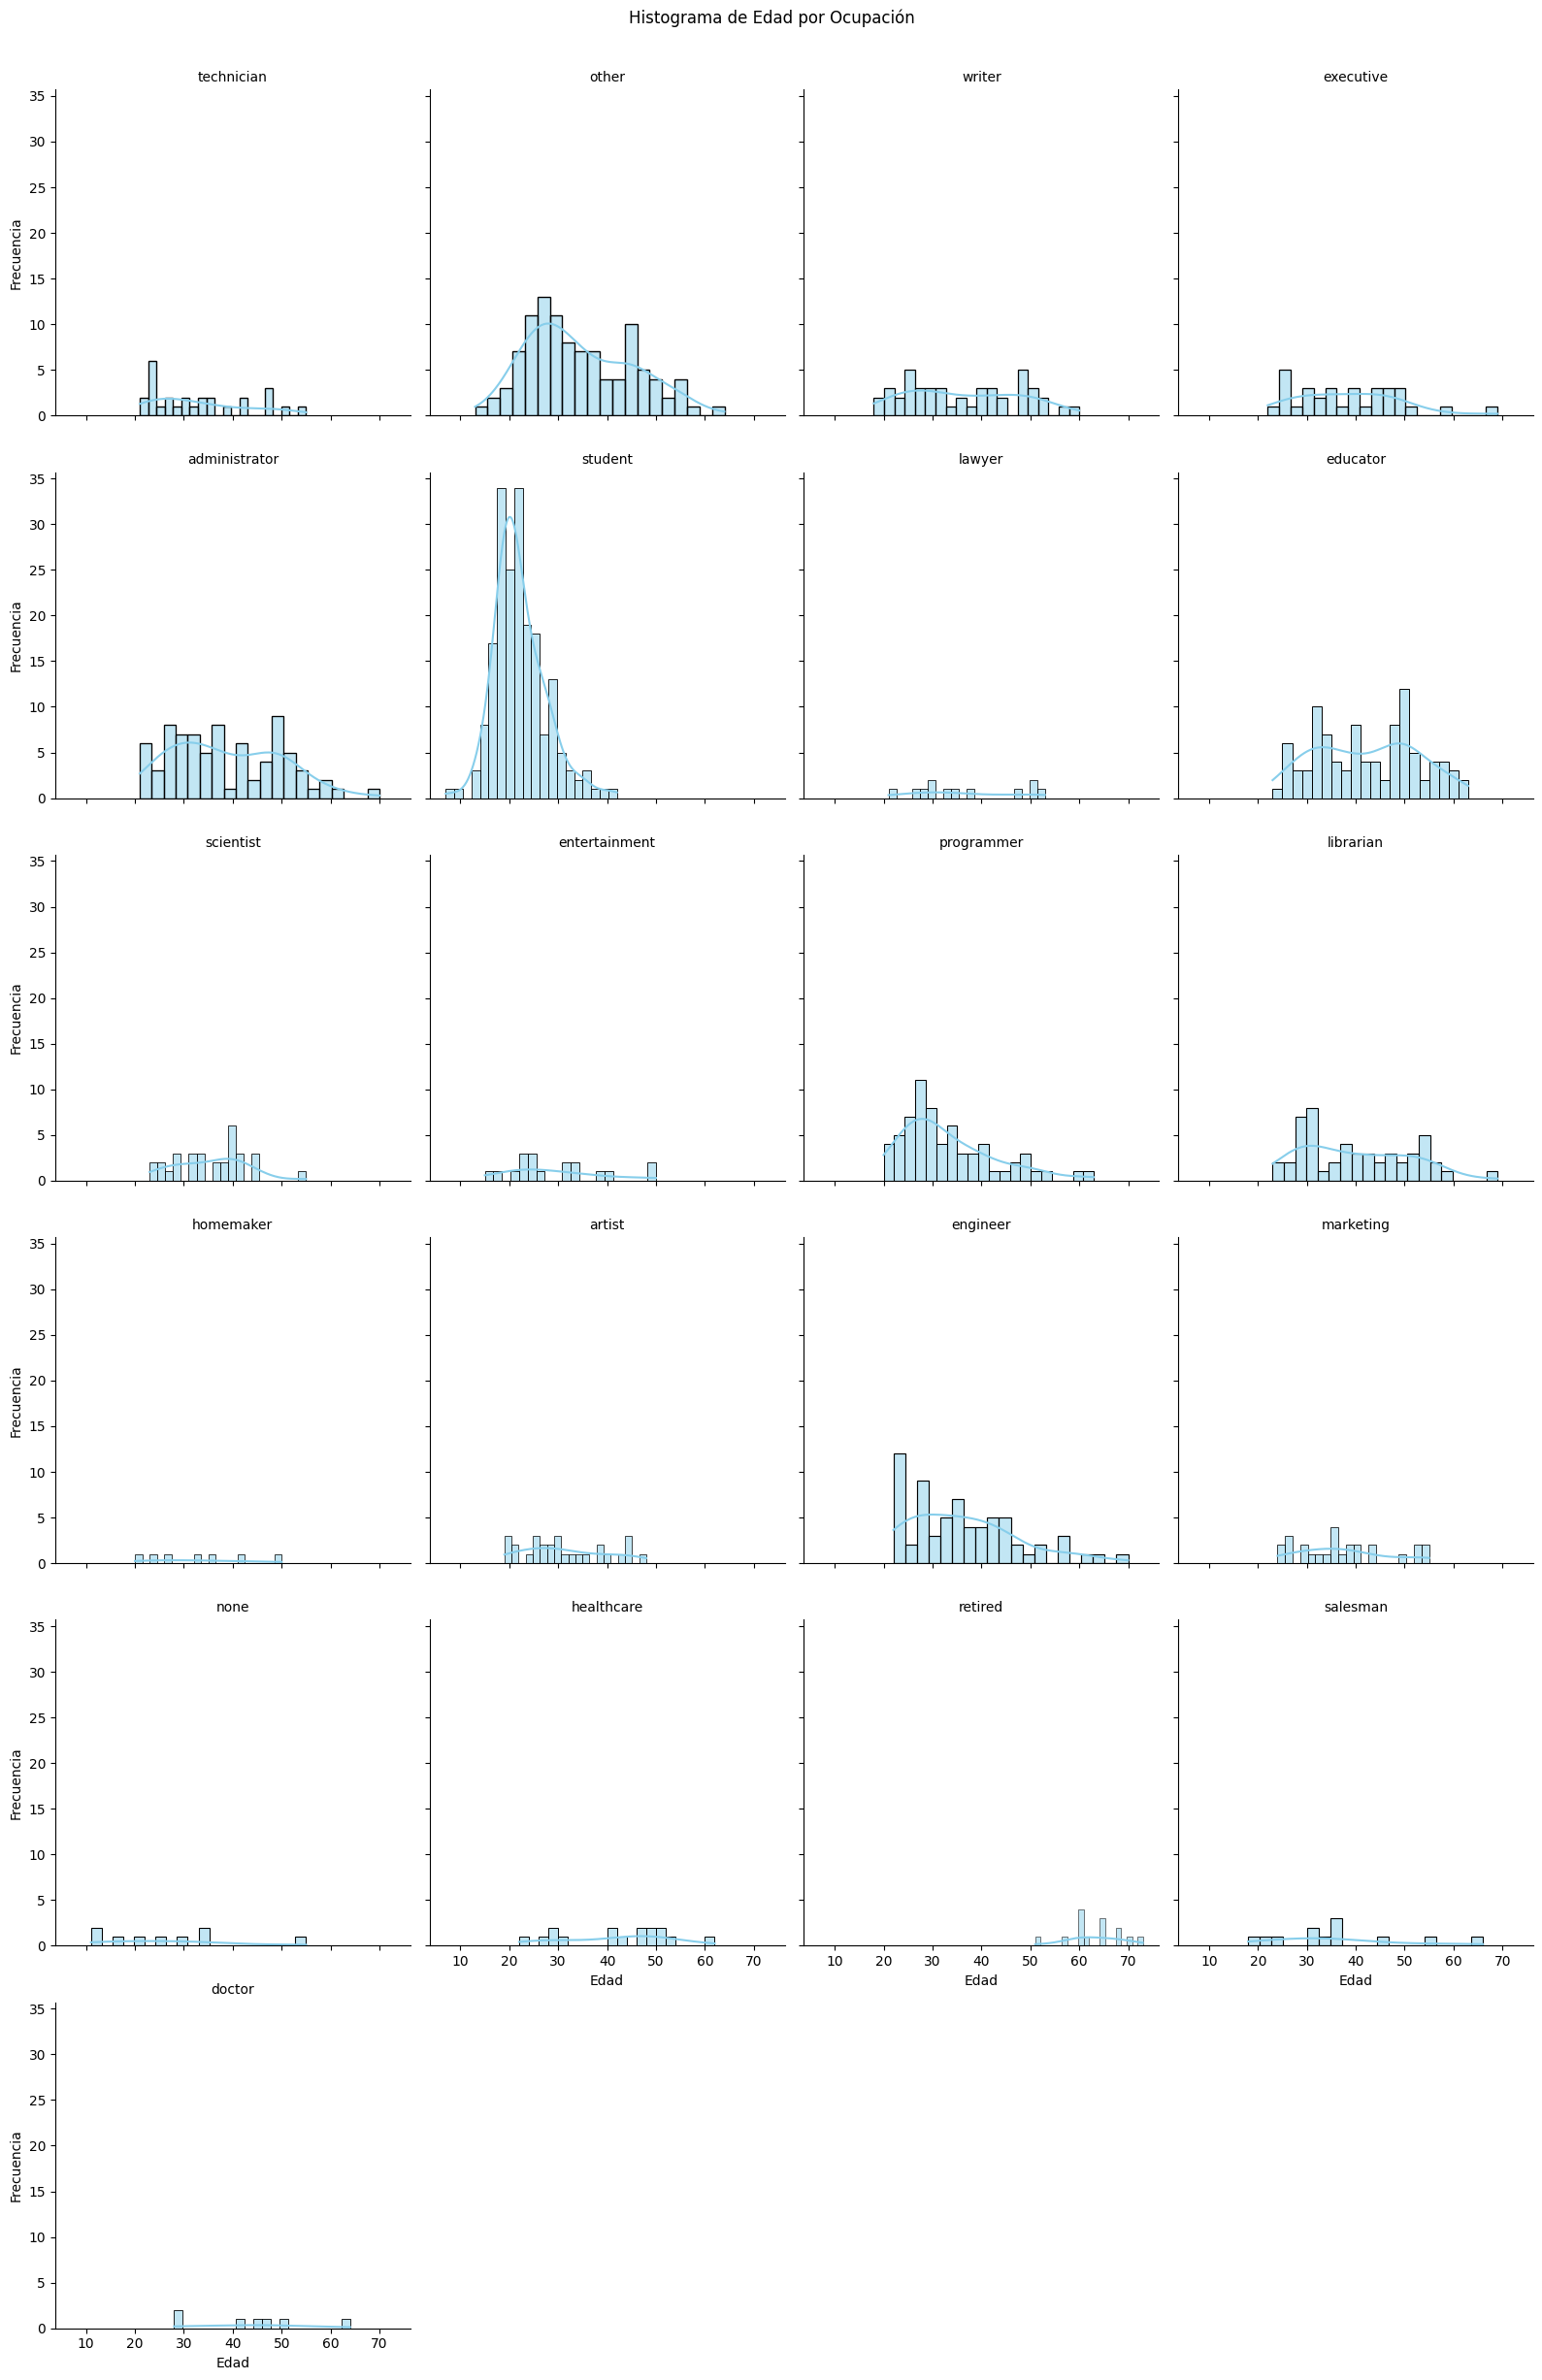

In [99]:
# Gráfico histograma edad y ocupaciones
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(ocupaciones, col="occupation", col_wrap=4, height=4)
g.map(sns.histplot, 'age', bins=20, kde=True, color='skyblue')
g.set_axis_labels('Edad', 'Frecuencia')
g.set_titles(col_template="{col_name}")
plt.suptitle('Histograma de Edad por Ocupación', y=1.02)
plt.show()

Se puede apreciar, que la edad más frecuente se encuentra en 30 años, como se había mostrado anteriormente en el análisis de la moda.